# Plotting with Matplotlib

<img src="files/figure.png">

- The figure - keeps track of all the child Axes, a smattering of ‘special’ artists (titles, figure legends, etc), and the canvas
- The Axes - contains two (or three in the case of 3D) Axis object, has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel())
- The Axis - takes care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks)
- Artists - Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects)

## Basic Plotting (plotting with pyplot's state machine)
### Single Figure
    Within a single plot you can
       1. Create a figure
       2. Create a plotting area
       3. Plot lines
       4. Decorate and anotate the plot

In [2]:
import matplotlib.pyplot as plt
import matplotlib

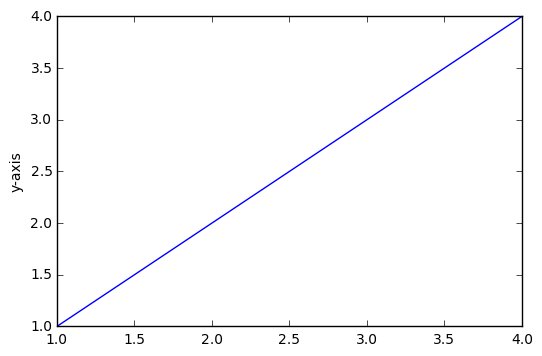

In [53]:
#Straight line with axis label
%matplotlib inline
plt.plot([1,2,3,4],[1,2,3,4])
plt.ylabel("y-axis")
plt.show()

<IPython.core.display.Javascript object>


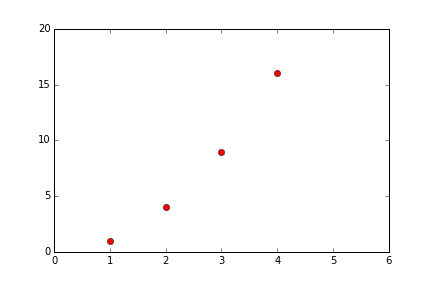

In [66]:
#Exponential line with custom markers
%matplotlib notebook
plt.plot([1,2,3,4],[1,4,9,16], 'ro')
plt.axis([0,6,0,20])
plt.show()

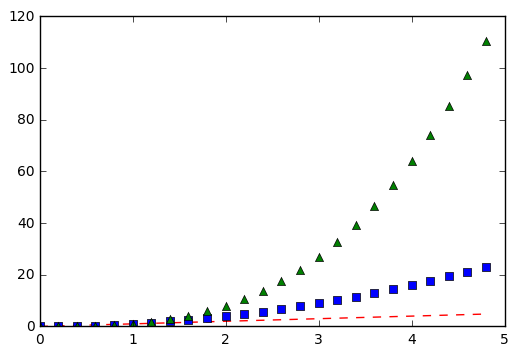

In [6]:
#Multiple equations on one figure with custom markers
%matplotlib inline
import numpy as np

t = np.arange(0, 5, 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Most editing to the graph can be done with the "setp" function

<IPython.core.display.Javascript object>


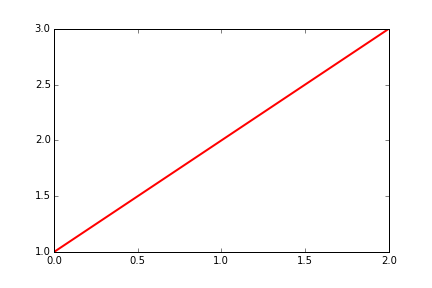

In [68]:
#Custom plotting given by "setp"
%matplotlib notebook
lines = plt.plot([1,2,3])
plt.setp(lines, color='r', linewidth=2.0)
plt.show()

### Multiple figures
    Pyplot and MATLAB have the concept of a current axes "gca()" and current figure "gcf()"
    We will look at 
     - Multiple subplots
     - Multiple figures

<IPython.core.display.Javascript object>


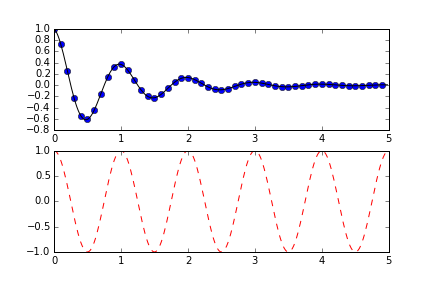

In [33]:
%matplotlib notebook
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

<IPython.core.display.Javascript object>


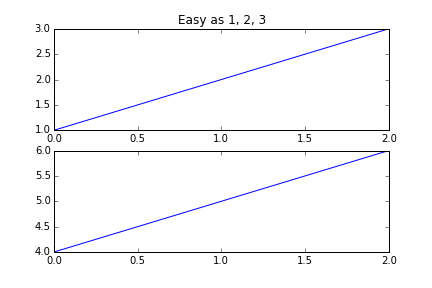

<IPython.core.display.Javascript object>


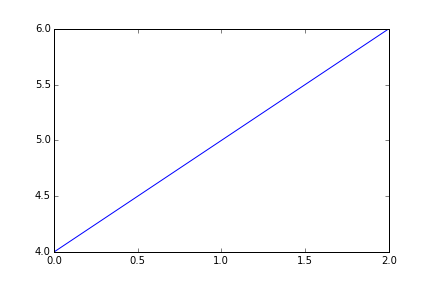

In [69]:
%matplotlib notebook
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

## The Artist API
### Typically pyplot should only be used for creating figures, and then use the object methods for the rest.

The matplotlib api
 - matplotlib.backend_bases.FigureCanvas
 - matplotlib.backend_bases.Renderer
 - matplotlib.artist.Artist - represents and lays out the figure

<img src="files/artistapi.png">

Two types of "Artists"

    A. Primitives
        Examples:
        1. Line2D
        2. Rectangle
        3. Text
        4. AxesImage
   
    B. Containers
        Examples: 
        1. Axis
        2. Axes
        3. Figure

Example: Plotting with lines and and multiple subplots

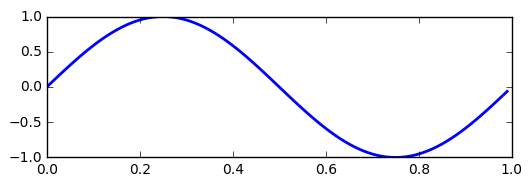

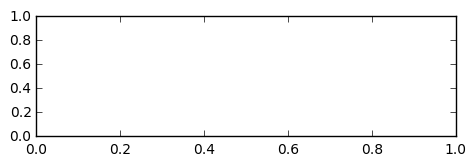

In [42]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(2,1,1) # two rows, one column, first plot
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3]) #Creating another plot, you can put it anywhere on the figure
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2) #tuple unpacking, plotting on first plot
plt.show()

#### We can access the "lines" of a certain axes. Line is the only object within ax.lines

In [45]:
ax.lines[0]

In [46]:
line

### Customizing your plots with patches 

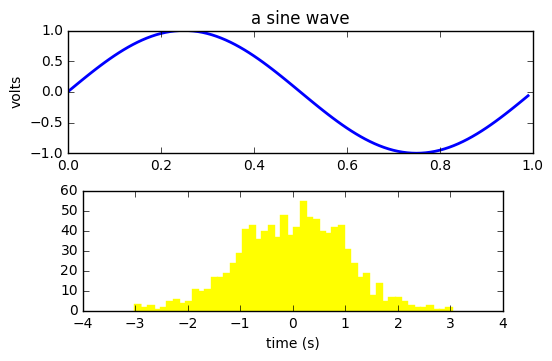

In [43]:
%matplotlib inline
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
    facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')
plt.show()

#### We can look at the properties of the figure patch

In [61]:
%matplotlib inline
matplotlib.artist.getp(fig.patch)

    aa = False
    agg_filter = None
    alpha = 0.5
    animated = False
    antialiased or aa = False
    axes = None
    bbox = Bbox('array([[ 0.,  0.],\n       [ 1.,  1.]])')
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(TransformedBbox(Bbox('array([[ 0.,...
    ec = (1, 1, 1, 0.5)
    edgecolor or ec = (1, 1, 1, 0.5)
    extents = Bbox('array([[   0.,    0.],\n       [ 432.,  288....
    facecolor or fc = (1.0, 0.0, 0.0, 0.5)
    fc = (1.0, 0.0, 0.0, 0.5)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    joinstyle = miter
    label = 
    linestyle or ls = solid
    linewidth or lw = 0.0
    ls = solid
    lw = 0.0
    patch_transform = CompositeGenericTransform(BboxTransformTo(Bbox('ar...
    path = Path(array([[ 0.,  0.],        [ 1.,  0.],        ...
    path_effects = []
    picker = None
    rasterized = None
    sketch_par

#### We can change these patch characteristics

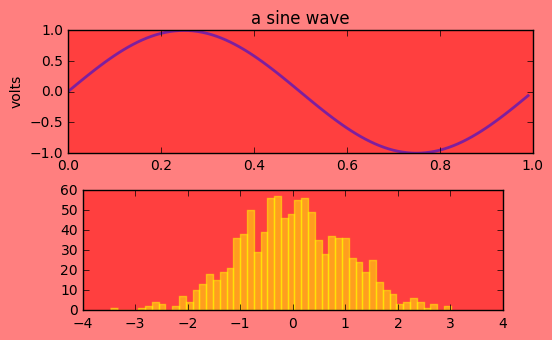

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
    facecolor='yellow', edgecolor='yellow')

line.set(alpha = 0.5)
for patch in patches:
    patch.set_alpha(0.5)
    
fig.patch.set(fc = 'red')
fig.patch.set(alpha = 0.5)s
ax1.patch.set(fc = 'red',alpha = 0.5)
ax2.patch.set(fc = 'red',alpha = 0.5)
plt.show()

# Object Containers
## Figure container
<img src="files/figurecontainer.png">

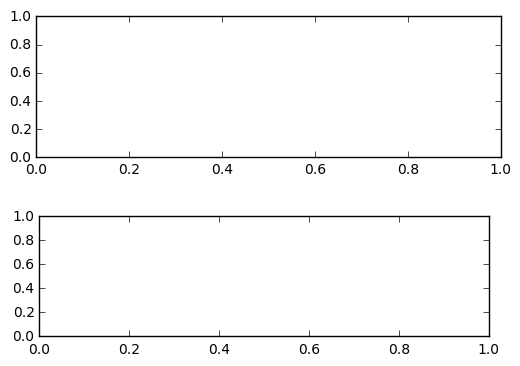

In [79]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.13, 0.1, .75, 0.3])

In [85]:
ax1

In [86]:
print(fig.axes)

[<matplotlib.axes._subplots.AxesSubplot object at 0x1090449e8>, <matplotlib.axes._axes.Axes object at 0x108a6d390>]


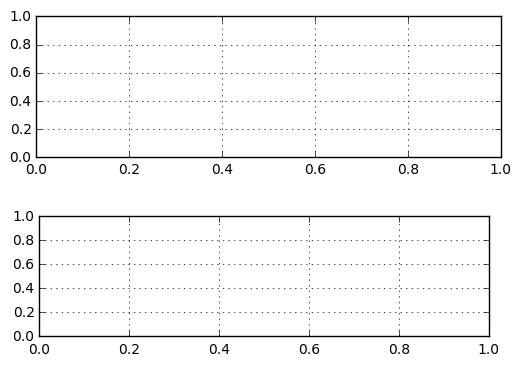

In [88]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_axes([0.13, 0.1, .75, 0.3])
for ax in fig.axes:
    ax.grid(True)

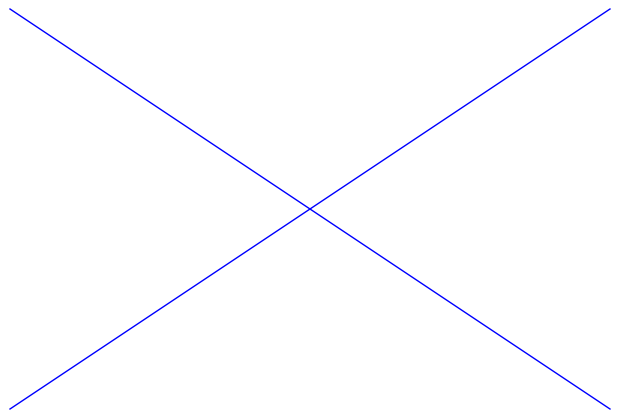

In [89]:
fig = plt.figure()
l1 = matplotlib.lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = matplotlib.lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])
fig.canvas.draw()

## Axes container
<img src="files/artistsinaxes.png">
<img src="files/axeshelpermethods.png">

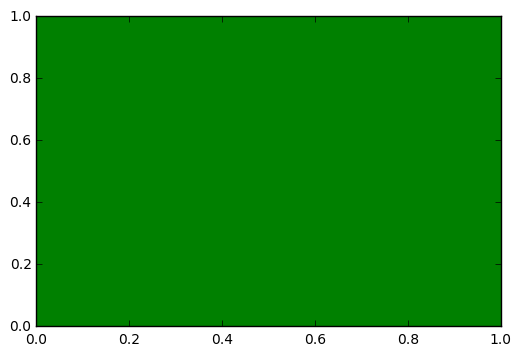

In [4]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # a Rectangle instance
rect.set_facecolor('green')

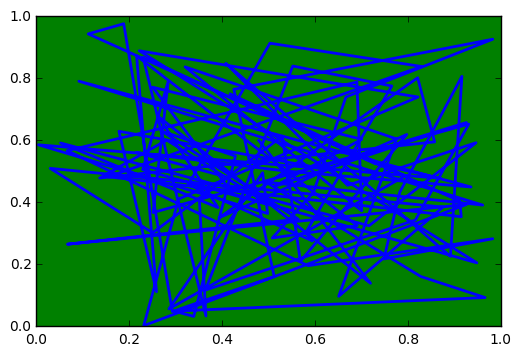

In [10]:
%matplotlib inline
fig = plt.figure()
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)

## Axis Container
<img src="files/axishelpermethods.png">

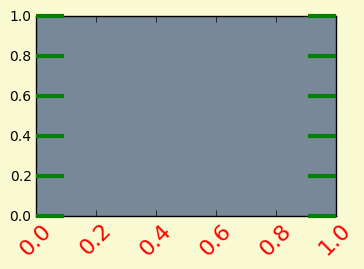

In [75]:
# plt.figure creates a matplotlib.figure.Figure instance
fig = plt.figure()
rect = fig.patch # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([1, 0.3, .5, 0.5])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(20)
    line.set_markeredgewidth(3)

### Tick attributes
<img src="files/tickattributes.png">

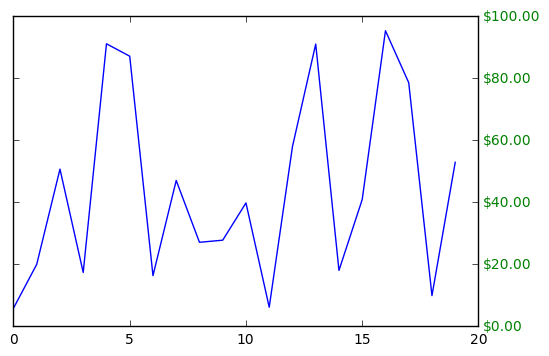

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True
    tick.label2.set_color('green')

# ANIMATION TIME